In [59]:
class Polygon(object):
    def __init__(self, id):
        self.id = id
        
    def letter(self, n):
        return self.id

class Rectangle(Polygon):
    def __init__(self, id, width, height):
        #super(self.__class__, self).__init__(id)
        Polygon.__init__(self, id)
        self.shape = (width, height)


#Rectangle(id='first', width=2, height=4)
p = Polygon(id='second')
r = Rectangle(p, width=3, height=4)

r.letter(2)

In [65]:
class Common(object):
    def __init__(self,x):
        self.x = x
        
    def sharedMethod(self, n):
        print(self.x[n])

class Alpha(Common):
    def __init__(self):
        Common.__init__(self,"Alpha")

class Bravo(Common):
    def __init__(self):
        Common.__init__(self,"Bravo")

Bravo().x


'Bravo'

In [4]:
class Meow(object):
    
    def __init__(self,x):
        self.x = x
        
    def some(self):
        return Meow.pos2range(self.x)
    
    @staticmethod
    def pos2range(pos): 
        if "-" not in pos:
            split = pos.split(":")
            pos = "{}:{}-{}".format(split[0], split[1], split[1])
            return pos
        else:
            pos



Meow("2:123").some()

'2:123-123'

In [45]:
class ComputerState(object):
    """ Abstract base class of state of a computer """
    
    name = "state"
    allowed = []
    
    def switch(self, state):
        """ Switch to new state """
        if state.name in self.allowed:
            print('Current:',self,' => switched to new state',state.name   )      
            self.__class__ = state
        else:
            print('Current:',self,' => switching to',state.name,'not possible.')

    def __str__(self):
        return self.name
    
class Off(ComputerState):
    """ State being switched off """

    name = "off"
    allowed = ['on']

class On(ComputerState):
    """ State of being powered on and working """

    name = "on"
    allowed = ['off','suspend','hibernate']

class Suspend(ComputerState):
    """ State of being in suspended mode after switched on """

    name = "suspend"
    allowed = ['on']

class Hibernate(ComputerState):
    """ State of being in hibernation after powered on """

    name = "hibernate"
    allowed = ['on']

class Computer(object):
    """ A class representing a computer """

    def __init__(self, model='HP'):
        self.model = model
        # State of the computer - default is off.
        self.state = Off()

    def change(self, state):
        """ Change state """

        self.state.switch(state)


comp = Computer()
# Switch on
comp.change(On)
# Switch off
comp.change(Off)

# Switch on again
comp.change(On)
# Suspend
comp.change(Suspend)
# Try to hibernate - cannot!
comp.change(Hibernate)
# switch on back
comp.change(On)
# Finally off
comp.change(Off)

Current: off  => switched to new state on
Current: on  => switched to new state off
Current: off  => switched to new state on
Current: on  => switched to new state suspend
Current: suspend  => switching to hibernate not possible.
Current: suspend  => switched to new state on
Current: on  => switched to new state off


['AC', 'AF', 'AN', 'BaseQRankSum', 'DB', 'DP', 'DS', 'Dels', 'ExcessHet', 'FS', 'HaplotypeScore', 'InbreedingCoeff', 'MLEAC', 'MLEAF', 'MQ', 'MQ0', 'MQRankSum', 'QD', 'RPA', 'RU', 'ReadPosRankSum', 'SOR', 'STR', 'set']


/home/david/projects/pdVCF/pdVCF/vcf2dataframe.py:220: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop('INFO', axis=1)
/home/david/projects/pdVCF/pdVCF/vcf2dataframe.py:253: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop('UID', axis=1)
/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


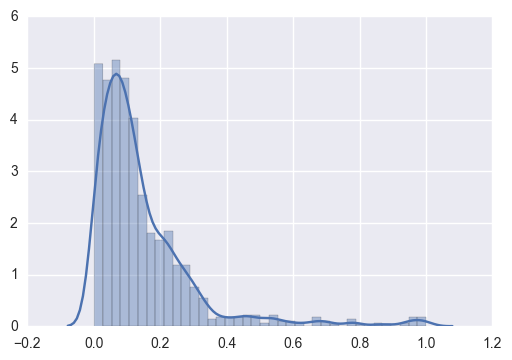

In [22]:
from pdVCF.pdVCF import VCF
import seaborn as sns
%matplotlib inline


t = "26PL1207.oct.noInDels.recode.vcf"
o = "var.both.taadUkOctoberRepeatLibrariesDec2016.filters.vcf"

test_vcf = VCF(o)



m = test_vcf.get_genotype('AB').T
sns.distplot(m.mean())

